In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import array, exp
import pandas as pd
import scipy
import statistics as stat
from scipy.stats import poisson, nbinom, chisquare
from scipy.optimize import curve_fit
from scipy.special import factorial
from scipy import asarray as ar,exp
from scipy import stats
from sklearn.linear_model import LinearRegression, PoissonRegressor
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

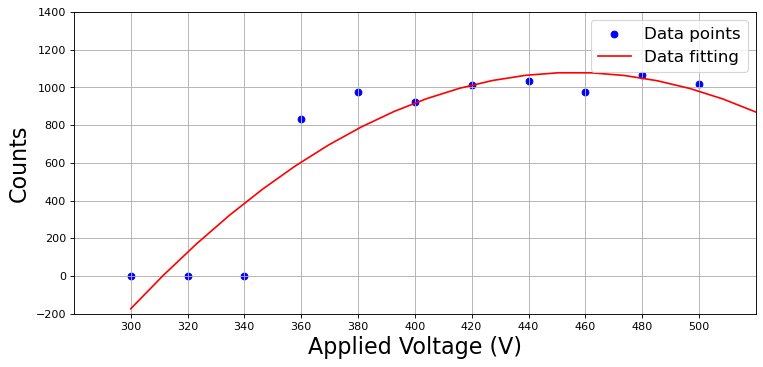

In [5]:
volts = [300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500]
counts = [0, 0, 0, 831, 976, 923, 1010, 1031, 973, 1063, 1016]

df = pd.DataFrame({'volts': [300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500],
                   'counts': [0, 0, 0, 831, 976, 923, 1010, 1031, 973, 1063, 1016]})

plt.figure(figsize = (11, 5), dpi = 80)
plt.scatter(df.volts, df.counts, label = 'Data points', color = 'blue')
model = np.poly1d(np.polyfit(df.volts, df.counts, 2))
polyline = np.linspace(300, 520, 20)
plt.plot(polyline, model(polyline), label = 'Data fitting', color = 'red')
plt.legend(loc = 'upper right', fontsize = 15)
plt.grid(True)
plt.xlim(280, 520)
plt.xticks(volts)
plt.ylim(-200, 1400)
plt.xlabel("Applied Voltage (V)", fontsize = 20)
plt.ylabel("Counts", fontsize = 20)
plt.savefig("Counts vs Applied Voltage.png")
plt.show()

In [6]:
cs_10 = [95, 94, 145, 99, 106, 97, 91, 83, 103, 108, 113, 106, 109, 100, 77, 104, 91, 99, 113, 102, 101, 107, 106, 80, 109, 98, 100, 102, 93, 108, 99, 85, 105, 82, 113, 93, 79, 103, 107, 104, 111, 103, 98, 113, 103, 103, 86, 105, 91, 114, 87, 123, 106, 94, 99, 110, 87, 82, 106, 92, 87, 102, 116, 95, 112, 110, 94, 112, 109, 102, 115, 110, 98, 99, 106, 119, 94, 91, 109, 98, 103, 95, 93, 108, 101, 85, 98, 87, 109, 111, 113, 98, 110, 106, 110, 101, 102, 97, 105, 94]
cs_1 = [6, 10, 10, 9, 7, 13, 13, 10, 7, 7, 16, 9, 9, 11, 11, 10, 13, 9, 7, 9, 8, 9, 5, 11, 11, 11, 10, 8, 8, 6, 13, 9, 8, 9, 8, 11, 13, 13, 9, 8, 5, 12, 10, 8, 12, 13, 13, 9, 13, 7, 15, 14, 9, 9, 6, 8, 7, 11, 13, 10, 10, 15, 6, 16, 12, 8, 6, 11, 7, 14, 10, 9, 13, 16, 9, 8, 9, 13, 16, 14, 12, 13, 10, 9, 8, 7, 9, 9, 8, 9, 7, 7, 12, 9, 11, 8, 10, 14, 10, 9]
ba_10 = [24, 20, 22,32, 29, 19, 18, 23, 18, 22, 23, 20, 20, 20, 23, 20, 27, 22, 20, 24, 22, 23, 29, 22, 18, 34, 27, 26, 30, 23, 23, 31, 33, 25, 23, 25, 21, 19, 25, 22, 29, 22, 24, 24, 18, 23, 22, 19, 22, 20, 32, 22, 26, 25, 18, 23, 25, 22, 21, 25, 27, 19, 27, 24, 34, 22, 26, 22, 35, 21, 18, 28, 26, 30, 25, 24, 20, 20, 25, 21, 23, 20, 18, 26, 20, 20, 20, 24, 34, 23, 16, 18, 28, 23, 30, 18, 19, 19, 19, 24] 
ba_1 = [1, 2, 2, 1, 2, 2, 2, 1, 4, 1, 4, 3, 3, 4, 1, 2, 1, 3, 3, 3, 5, 3, 3, 3, 3, 2, 1, 1, 1, 1, 0, 4, 3, 3, 1, 4, 0, 3, 2, 4, 3, 3, 2, 1, 1, 3, 2, 1, 4, 6, 3, 3, 1, 7, 2, 0, 0, 3, 3, 2, 1, 1, 2, 1, 5, 1, 3, 1, 5, 4, 2, 0, 1, 3, 2, 2, 2, 0, 4, 6, 5, 3, 1, 0, 3, 1, 4, 1, 5, 1, 3, 3, 2, 2, 4, 1, 4, 4, 3, 5]

In [7]:
cs_10.sort()
cs_1.sort()
ba_1.sort()
ba_10.sort()

In [8]:
## Means
ba_1_mu = stat.mean(ba_1)
ba_10_mu = stat.mean(ba_10)
cs_1_mu = stat.mean(cs_1)
cs_10_mu = stat.mean(cs_10)

## Standard Deviations
ba_1_sigma = stat.stdev(ba_1)
ba_10_sigma = stat.stdev(ba_10)
cs_1_sigma = stat.stdev(cs_1)
cs_10_sigma = stat.stdev(cs_10)

## Square root of means
ba_1_root = np.sqrt(ba_1_mu)
ba_10_root = np.sqrt(ba_10_mu)
cs_1_root = np.sqrt(cs_1_mu)
cs_10_root = np.sqrt(cs_10_mu)

ratio = [ba_1_root / ba_1_sigma, ba_10_root / ba_10_sigma, cs_1_root / cs_1_sigma, cs_10_root / cs_10_sigma]
mu = [ba_1_mu, ba_10_mu, cs_1_mu, cs_10_mu] 

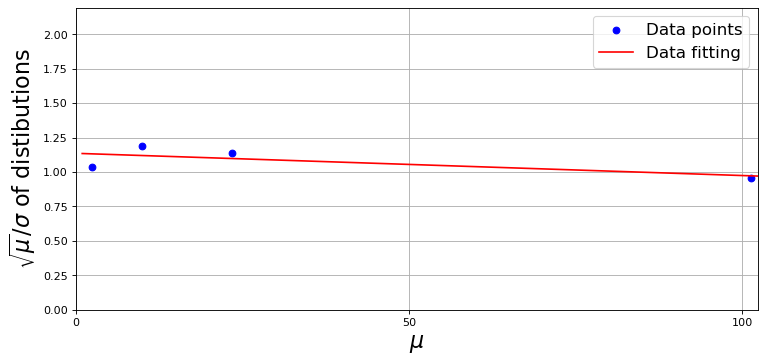

In [15]:
df = pd.DataFrame({'mu': [2.43, 23.45, 10.01, 101.26],
                   'ratio': [1.035149053025419, 1.1360661433826706, 1.1923983392042905, 0.9587799530791435]})

plt.figure(figsize = (11, 5), dpi = 80)
plt.scatter(df.mu, df.ratio, label = 'Data points', color = 'blue')
model = np.poly1d(np.polyfit(df.mu, df.ratio, 1))
polyline = np.linspace(1, 200, 4)
plt.plot(polyline, model(polyline), label = 'Data fitting', color = 'red')
plt.legend(loc = 'upper right', fontsize = 15)
plt.grid(True)
plt.xlim(0, max(mu) + 1)
plt.xticks([0,50,100])
plt.ylim(0, max(ratio) + 1)
plt.xlabel("$\mu$", fontsize = 20)
plt.ylabel("$\sqrt{\mu}/{\sigma}$ of distibutions", fontsize = 20)
plt.savefig("Ratio.png")
plt.show()

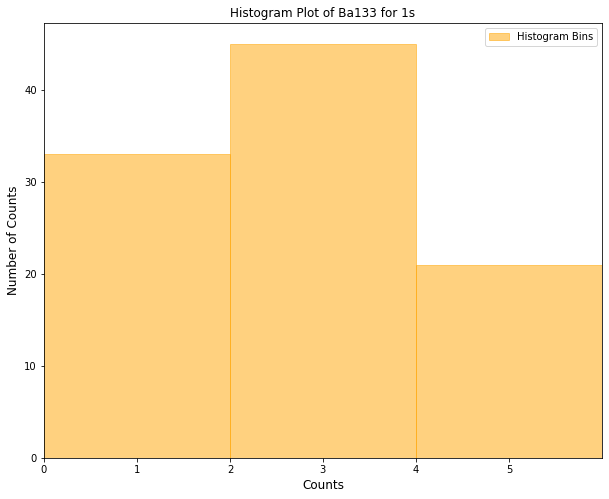

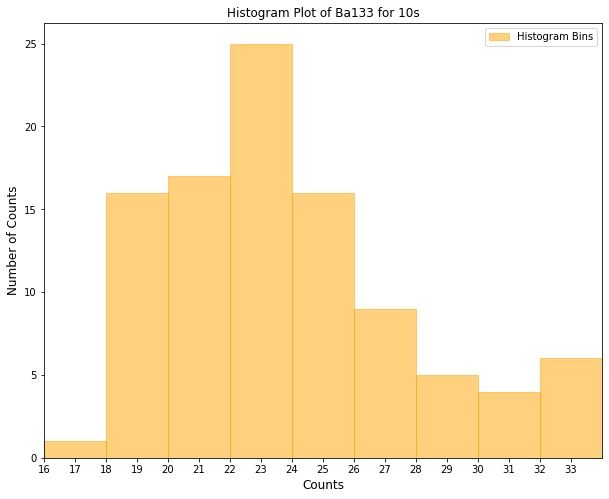

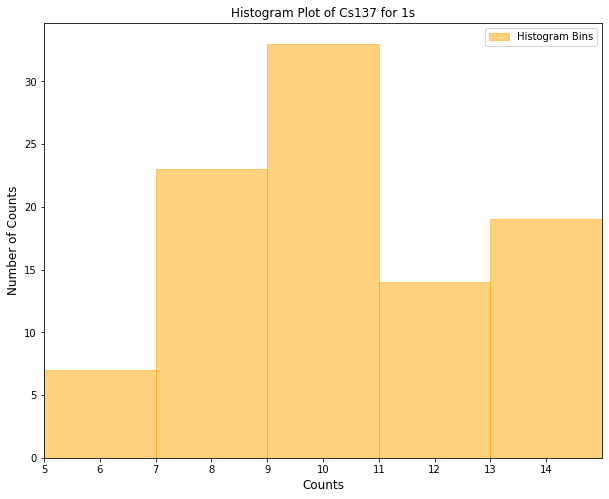

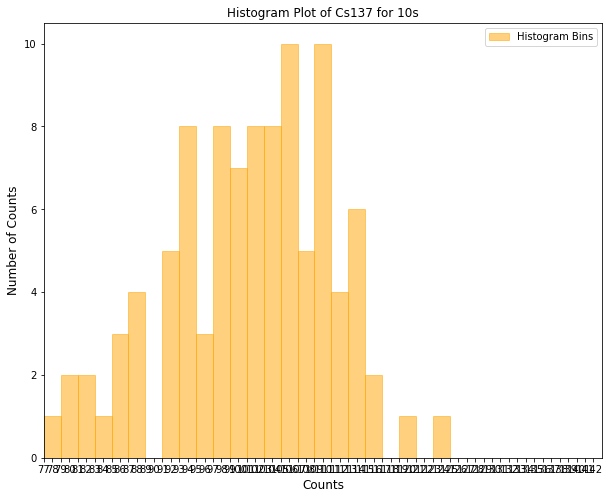

In [20]:
def my_hist(arr, name):

    fig = plt.figure(figsize=(10,8))
    data, bins, data_str = plt.hist(arr,
    density = False,
    color = "orange",
    bins=
    np.arange(min(arr),max(arr),2),
    cumulative=False,
    alpha = 0.5,
    edgecolor='orange',
    label = 'Histogram Bins')
    plt.legend(loc='upper right')
    plt.title("Histogram Plot of " + name)
    plt.xlim(min(bins),max(bins))
    plt.xticks(np.arange(min(bins),max(bins)))
    plt.ylabel('Number of Counts', fontsize
    = "large")
    plt.xlabel('Counts', fontsize = "large")
    plt.savefig("Histogram Plot of " + name)
    plt.show()
my_hist(ba_1, "Ba133 for 1s")
my_hist(ba_10, "Ba133 for 10s")
my_hist(cs_1, "Cs137 for 1s")
my_hist(cs_10, "Cs137 for 10s")


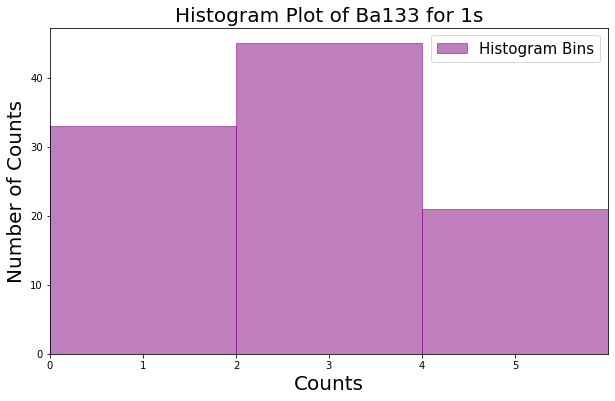

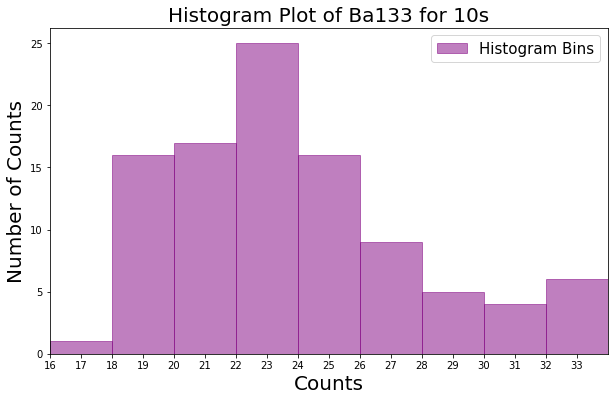

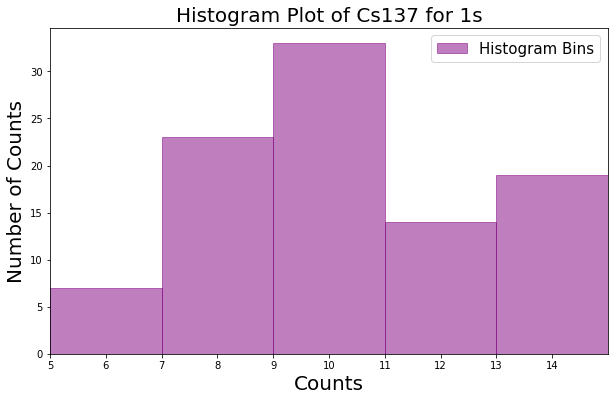

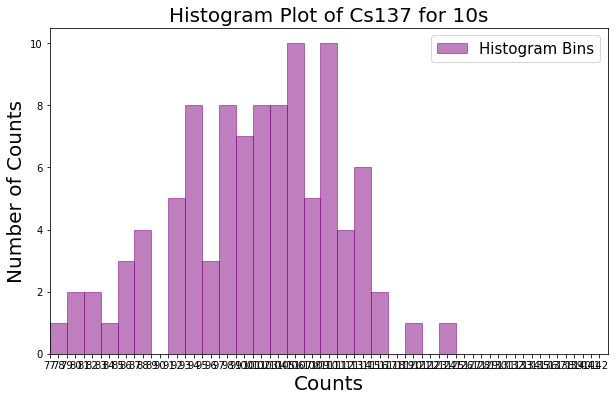

In [10]:
def hist1(arr, name):
    
    fig = plt.figure(figsize = (10,6))
    hist, bin_edges, data_str = plt.hist(arr, density = False, color = "purple", bins = np.arange(min(arr), max(arr),2), cumulative = False, alpha = 0.5, edgecolor = 'purple', label = 'Histogram Bins')
    
    plt.legend(loc = 'upper right', fontsize = 15)
    plt.title("Histogram Plot of " + name, fontsize = 20)
    plt.xlim(min(bin_edges),max(bin_edges))
    plt.xticks(np.arange(min(bin_edges),max(bin_edges)))
    plt.ylabel('Number of Counts', fontsize = 20)
    plt.xlabel('Counts', fontsize = 20)
    plt.savefig("Histogram1 Plot of " + name)
    plt.show()
    
hist1(ba_1, "Ba133 for 1s")
hist1(ba_10, "Ba133 for 10s")
hist1(cs_1, "Cs137 for 1s")
hist1(cs_10, "Cs137 for 10s")
    

C:\Users\kubra\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\kubra\AppData\Local\Temp\ipykernel_33008\1292930430.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_hist_2, gaus(x_hist_2,*param_optimised), 'r:', color = 'blue', label = 'Gaussian fit')
C:\Users\kubra\AppData\Local\Temp\ipykernel_33008\1292930430.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
  plt.plot(arr, pois(arr),'r:', color = 'purple', label = 'Poisson fit')


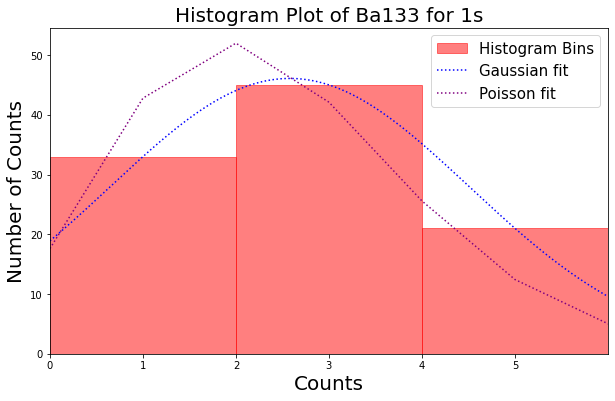

C:\Users\kubra\AppData\Local\Temp\ipykernel_33008\1292930430.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_hist_2, gaus(x_hist_2,*param_optimised), 'r:', color = 'blue', label = 'Gaussian fit')
C:\Users\kubra\AppData\Local\Temp\ipykernel_33008\1292930430.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
  plt.plot(arr, pois(arr),'r:', color = 'purple', label = 'Poisson fit')


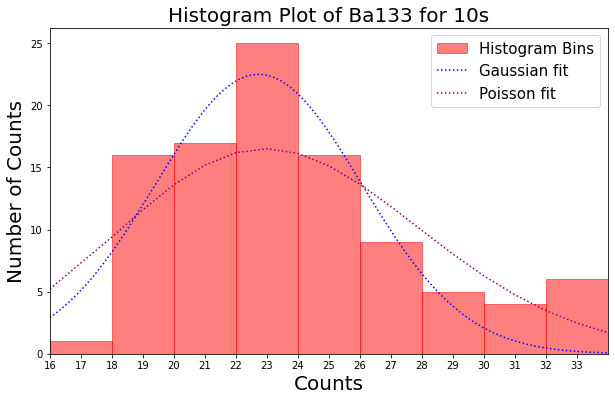

C:\Users\kubra\AppData\Local\Temp\ipykernel_33008\1292930430.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_hist_2, gaus(x_hist_2,*param_optimised), 'r:', color = 'blue', label = 'Gaussian fit')
C:\Users\kubra\AppData\Local\Temp\ipykernel_33008\1292930430.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
  plt.plot(arr, pois(arr),'r:', color = 'purple', label = 'Poisson fit')


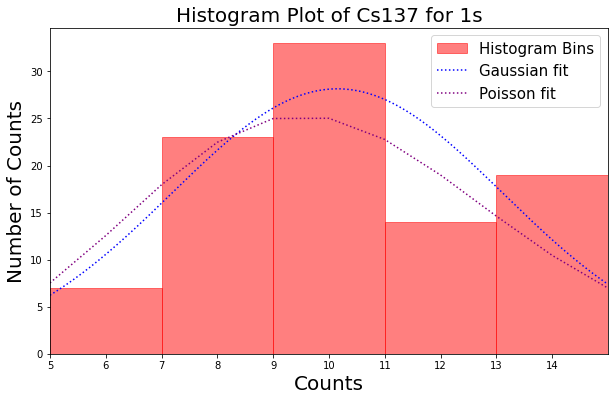

C:\Users\kubra\AppData\Local\Temp\ipykernel_33008\1292930430.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_hist_2, gaus(x_hist_2,*param_optimised), 'r:', color = 'blue', label = 'Gaussian fit')
C:\Users\kubra\AppData\Local\Temp\ipykernel_33008\1292930430.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
  plt.plot(arr, pois(arr),'r:', color = 'purple', label = 'Poisson fit')


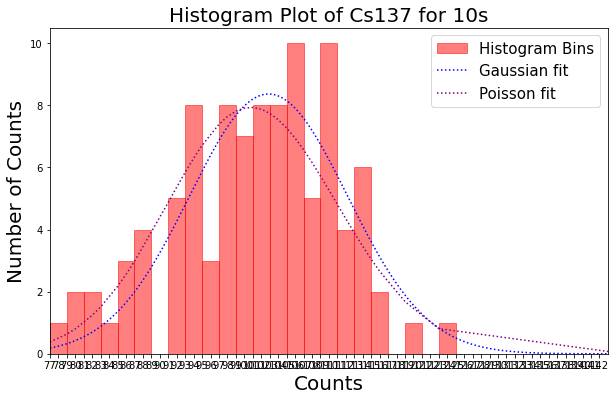

In [11]:
def hist2(arr, name):
    fig = plt.figure(figsize = (10,6))
    hist, bin_edges, data_str = plt.hist(arr, density = False, color = "red", bins = np.arange(min(arr), max(arr),2), cumulative = False, alpha = 0.5, edgecolor = 'red', label = 'Histogram Bins')
    
    n = len(hist)
    x_hist = np.zeros((n),dtype = float) 
    for i in range(n):
        x_hist[i] = (bin_edges[i+1]+bin_edges[i])/2
    y_hist = hist

    def gaus(X, C, mean, sigma):
        return 200*(C*np.exp(-(X-mean)**2/(2*sigma**2)))
    
    mean = stat.mean(arr)
    sigma = stat.stdev(arr)
    
    def pois(arr):
        poisson_pd = poisson.pmf(arr, stat.mean(arr))
        return 200*poisson_pd
      
    param_optimised, param_covariance_matrix = curve_fit(gaus, x_hist, y_hist, p0 = [max(y_hist), mean, sigma], maxfev = 10000)
    x_hist_2 = np.linspace(np.min(x_hist)-1,np.max(x_hist)+1, 5000)
    plt.plot(x_hist_2, gaus(x_hist_2,*param_optimised), 'r:', color = 'blue', label = 'Gaussian fit')
    plt.plot(arr, pois(arr),'r:', color = 'purple', label = 'Poisson fit')
    

    plt.legend(loc = 'upper right', fontsize = 15)
    plt.xlim(min(bin_edges),max(bin_edges))
    plt.xticks(np.arange(min(bin_edges),max(bin_edges)))
    plt.title("Histogram Plot of " + name, fontsize = 20)
    plt.ylabel('Number of Counts', fontsize = 20)
    plt.xlabel('Counts', fontsize = 20)
    plt.savefig("Histogram2 Plot of " + name)
    plt.show()
    
hist2(ba_1, "Ba133 for 1s")
hist2(ba_10, "Ba133 for 10s")
hist2(cs_1, "Cs137 for 1s")
hist2(cs_10, "Cs137 for 10s")


In [12]:
## Calculation of Chi

def Gaus(arr):
    mean, var = scipy.stats.distributions.norm.fit(arr)
    fitted_data = scipy.stats.distributions.norm.pdf(arr, mean, var)
    return fitted_data, mean

def Pois(arr, mean):
    probs = poisson.pmf(arr, mu = mean)
    return probs


def chi_calc(arr):
    gaus, mean = Gaus(arr)
    pois = Pois(arr, mean)

    chi_gaus, p_gaus = chisquare(f_obs = gaus) 
    chi_gausdop = chi_gaus/5 
    chi_pois, p_pois = chisquare(f_obs = pois) 
    chi_poisdop = chi_pois/5
    return chi_gaus, chi_gausdop, chi_pois, chi_poisdop

chi_calc(ba_1)
chi_calc(ba_10)
chi_calc(cs_1)
chi_calc(cs_10)

(0.3740597690959147,
 0.07481195381918294,
 0.41971482594255033,
 0.08394296518851006)

In [13]:
n_0 = [26, 7, 22, 4, 13, 14, 2, 9, 17, 12, 6, 29, 14, 23, 5, 4, 2, 5, 13, 7, 10, 21, 7, 6, 32, 11, 24, 6, 17, 5, 7, 3, 8, 8, 2, 8, 7, 2, 16, 11, 24, 12, 8, 15, 6, 6, 31, 3, 2, 7, 8, 3, 4, 2, 5, 17, 8, 15, 14, 3, 13, 7, 13, 3, 7, 2, 11, 4, 22, 3, 12, 3, 11, 25, 6, 9, 15, 12, 3, 21, 14, 4, 5, 9, 8, 8, 7, 3, 17, 5, 6, 31, 4, 18, 3, 28, 24, 14 ,4 ,2]
n_1 = [26, 22, 13, 2, 17, 6, 14, 5, 2, 13, 10, 7, 32, 24, 17, 7, 8, 2, 7, 16, 24, 8, 6, 31, 2, 8, 4, 5, 8, 14, 13, 13, 7, 11, 22, 12, 11, 6, 15, 3, 14, 5, 8, 7, 17, 6, 4, 3, 24, 4]

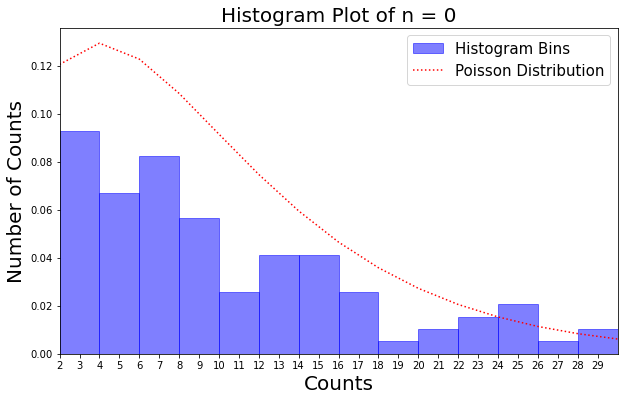

5.27 0.329375


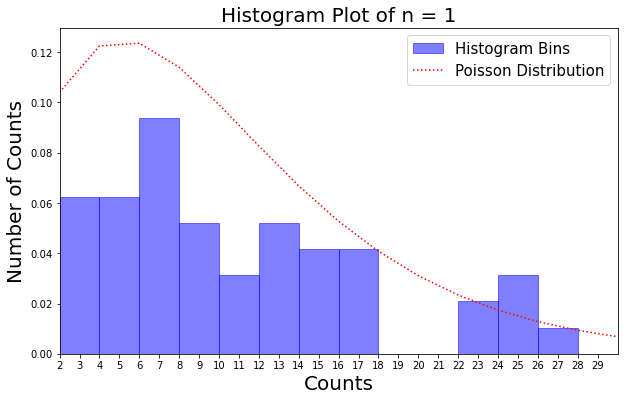

5.65 0.353125


In [14]:
### Second Part

def hist3(arr, n, name):
#"""Function to plot normalized histograms and the poisson distribution for the second part"""
    Var = np.var(arr)
    mu = np.mean(arr)
    p = (mu / Var)
    r = mu**2 / (Var - mu)
    n = len(arr)
    binwidth = 2
    fig = plt.figure(figsize = (10,6)) 
    data, bins, data_str = plt.hist(arr, density = True, color = "blue", bins = np.arange(min(arr), max(arr),2), cumulative = False, alpha = 0.5, edgecolor = 'blue', label = 'Histogram Bins')
    prob = (nbinom.cdf(bins + binwidth,r,p) - nbinom.cdf(bins,r,p))
    plt.plot(bins, prob,'r:', label = "Poisson Distribution" )
    plt.legend(loc = 'upper right', fontsize = 15)
    plt.xlim(min(bins),max(bins))
    plt.xticks(np.arange(min(bins),max(bins)))
    plt.title("Histogram Plot of " + name, fontsize = 20)
    plt.ylabel('Number of Counts', fontsize = 20)
    plt.xlabel('Counts', fontsize = 20)
    plt.savefig("Histogram3 Plot of " + name)
    plt.show()
    
hist3(n_0, 0, "n = 0")

#Alpha Calculation n = 0
Gaus_n0, mean_n0 = Gaus(n_0)
alpha_n0 = mean_n0/n_0
print(alpha_n0)

hist3(n_1, 1, "n = 1")

#Alpha Calculation n = 1
Gaus_n1, mean_n1 = Gaus(n_1)
alpha_n1 = mean_n1/n_1
print(alpha_n1)